<a href="https://colab.research.google.com/github/kilinandrea/FDA_Applications_1998-2023/blob/main/FDA_applications_1998_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's bring in the 5 datasets, and start joining them to form a final table.

In [74]:
marketing_lookup_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/MarketingStatus_Lookup.txt'
df_marketing_lookup = pd.read_csv(marketing_lookup_source, delimiter='\t')

marketing_status_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/MarketingStatus.txt'
df_marketing_status = pd.read_csv(marketing_status_source, delimiter='\t')

applications_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/Applications.txt'
df_applications = pd.read_csv(applications_source, delimiter='\t')

application_docs_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/ApplicationDocs.txt'
df_application_docs = pd.read_csv(application_docs_source, delimiter='\t', encoding='ISO-8859-1')  # Specify encoding here

products_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/Products_c.txt'
df_products = pd.read_csv(products_source, delimiter='\t', encoding='utf-16') # Specify encoding here


In [75]:
#check if the data has been pulled in properly
#df_marketing_lookup.head()
#df_marketing_status.head()
#df_applications.head()
#df_application_docs.head()
df_products.head()

,ApplNo,ProductNo,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard
0,4,4,SOLUTION --DROPS --OPHTHALMIC,1%,0.0,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE,0.0
1,159,1,TABLET --ORAL,500MG,0.0,SULFAPYRIDINE,SULFAPYRIDINE,0.0
2,552,1,INJECTABLE --INJECTION,"20,000 UNITS --ML",0.0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0
3,552,2,INJECTABLE --INJECTION,"40,000 UNITS --ML",0.0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0
4,552,3,INJECTABLE --INJECTION,"5,000 UNITS --ML",0.0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0


In [76]:
# merge datasets based on their primary key
merged_df = pd.merge(df_products, df_marketing_status, on='ApplNo', how = 'inner')
merged_df = pd.merge(merged_df, df_marketing_lookup, on = 'MarketingStatusID', how = 'inner')
merged_df = pd.merge(merged_df, df_applications, on = 'ApplNo', how = 'inner')
merged_df = pd.merge(merged_df, df_application_docs, on = 'ApplNo', how = 'inner')
merged_df.head()

,ApplNo,ProductNo_x,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard,MarketingStatusID,ProductNo_y,...,ApplType,ApplPublicNotes,SponsorName,ApplicationDocsID,ApplicationDocsTypeID,SubmissionType,SubmissionNo,ApplicationDocsTitle,ApplicationDocsURL,ApplicationDocsDate
0,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,45,1,SUPPL,25,0,http://www.accessdata.fda.gov/drugsatfda_docs/...,2007-10-04 00:00:00
1,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,32916,2,SUPPL,25,0,http://www.accessdata.fda.gov/drugsatfda_docs/...,2007-10-04 00:00:00
2,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,43991,10,ORIG,1,0,http://www.fda.gov/Drugs/DrugSafety/Postmarket...,2007-03-16 00:00:00
3,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,57473,2,SUPPL,26,0,http://www.accessdata.fda.gov/drugsatfda_docs/...,2019-02-07 00:00:00
4,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,57594,1,SUPPL,26,0,http://www.accessdata.fda.gov/drugsatfda_docs/...,2019-02-14 00:00:00


In [77]:
#remove unneeded columns
columns_to_drop = ['ProductNo_x', 'Strength', 'ReferenceDrug', 'ReferenceStandard', 'ProductNo_y', 'ApplType', 'ApplPublicNotes',
                   'ApplicationDocsTypeID', 'SubmissionType', 'SubmissionNo', 'ApplicationDocsTitle', 'ApplicationDocsURL',
                   'MarketingStatusID']

merged_df = merged_df.drop(columns=columns_to_drop)


#fix datetime to date only
merged_df['ApplicationDocsDate'] = pd.to_datetime(merged_df['ApplicationDocsDate'])
merged_df['ApplicationDocsDate'] = merged_df['ApplicationDocsDate'].dt.strftime('%Y-%m-%d')

#sort to see any duplicates
merged_df = merged_df.sort_values(by='ApplicationDocsID')

#drop any duplicates
merged_df = merged_df.drop_duplicates()

In [7]:
merged_df.head(15)

,ApplNo,Form,DrugName,ActiveIngredient,MarketingStatusDescription,SponsorName,ApplicationDocsID,ApplicationDocsDate
0,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,45,2007-10-04 00:00:00
1,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,32916,2007-10-04 00:00:00
2,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,43991,2007-03-16 00:00:00
3,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,57473,2019-02-07 00:00:00
4,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,57594,2019-02-14 00:00:00
5,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,45,2007-10-04 00:00:00
6,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,32916,2007-10-04 00:00:00
7,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,43991,2007-03-16 00:00:00
8,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,57473,2019-02-07 00:00:00
9,793,TABLET --ORAL,BUTISOL SODIUM,BUTABARBITAL SODIUM,Discontinued,MYLAN SPECIALITY LP,57594,2019-02-14 00:00:00


In [78]:
#remove duplicates based on two columns
merged_df = merged_df.drop_duplicates(subset=['ApplNo', 'ApplicationDocsDate'])
merged_df.head(15)

,ApplNo,Form,DrugName,ActiveIngredient,MarketingStatusDescription,SponsorName,ApplicationDocsID,ApplicationDocsDate
698,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,1,2003-07-28
1579,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,2,2002-11-27
480,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,3,2003-05-16
701,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,4,2005-04-12
1230,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,5,2005-08-04
439,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,6,2005-11-03
1452,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,7,2006-09-18
265,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Discontinued,WYETH PHARMS,8,2011-10-31
663,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,10,2014-12-04
1666,5010,TABLET --ORAL,DEMEROL,MEPERIDINE HYDROCHLORIDE,Discontinued,VALIDUS PHARMS,11,2003-03-10


In [79]:
# Let's remove any submission for discontinuation
merged_df = merged_df[merged_df['MarketingStatusDescription'] != 'Discontinued']

# Clean up the naming convention of the way in which the drug is being administered, 'Form'
merged_df.loc[:, 'Form'] = merged_df['Form'].str.extract(r'--\s*(.*)')[0]


merged_df.head(15)

<ipython-input-79-fd31d65e394c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'Form'] = merged_df['Form'].str.extract(r'--\s*(.*)')[0]


,ApplNo,Form,DrugName,ActiveIngredient,MarketingStatusDescription,SponsorName,ApplicationDocsID,ApplicationDocsDate
698,4782,ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,1,2003-07-28
1579,4782,ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,2,2002-11-27
480,4782,ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,3,2003-05-16
701,4782,ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,4,2005-04-12
1230,4782,ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,5,2005-08-04
439,4782,ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,6,2005-11-03
1452,4782,ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,7,2006-09-18
663,4782,ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,10,2014-12-04
324676,5213,ORAL,HYCODAN,HOMATROPINE METHYLBROMIDE -- HYDROCODONE BITAR...,Prescription,GENUS,14,2009-01-30
3069,5378,ORAL,DESOXYN,METHAMPHETAMINE HYDROCHLORIDE,Prescription,KEY THERAP,15,2013-08-27


Now, let's look at some graphs to better understand the data.

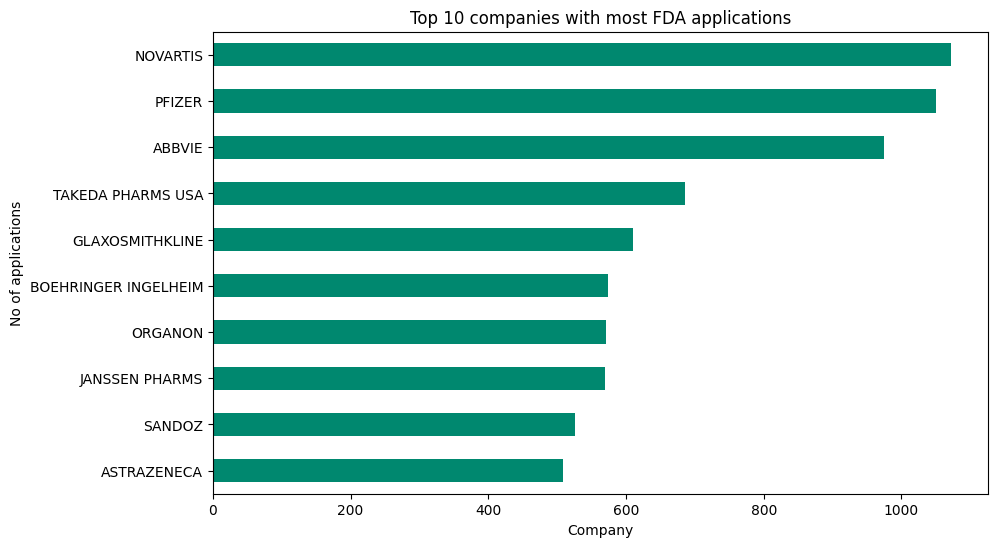

In [80]:
#which 10 companies have the most applications
company_counts = merged_df['SponsorName'].value_counts().head(10)

# Plot the bar plot
plt.figure(figsize=(10,6))
company_counts.sort_values(ascending=True).plot(kind='barh', color='#00886F')
plt.title('Top 10 companies with most FDA applications')
plt.xlabel('Company')
plt.ylabel('No of applications')

#Show the plot
plt.show()

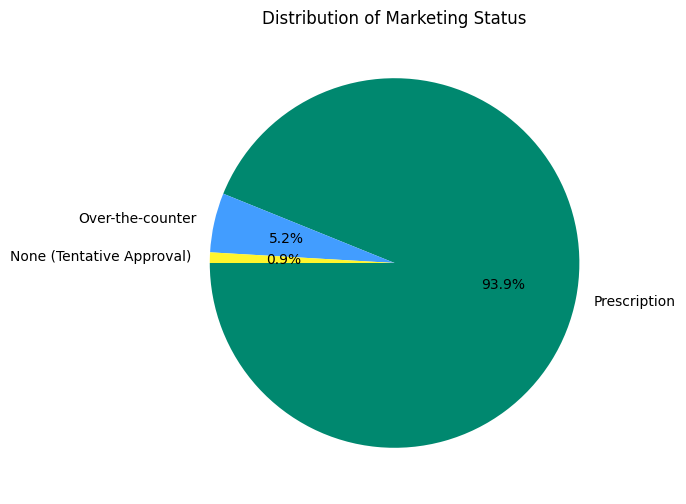

In [81]:
#what is the distribution of the different marketing statuses
status_counts = merged_df['MarketingStatusDescription'].value_counts()

# Plot the bar plot
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=180, colors=['#00886F','#429DFF','#FFF52D'])
plt.title('Distribution of Marketing Status')


#Show the plot
plt.show()

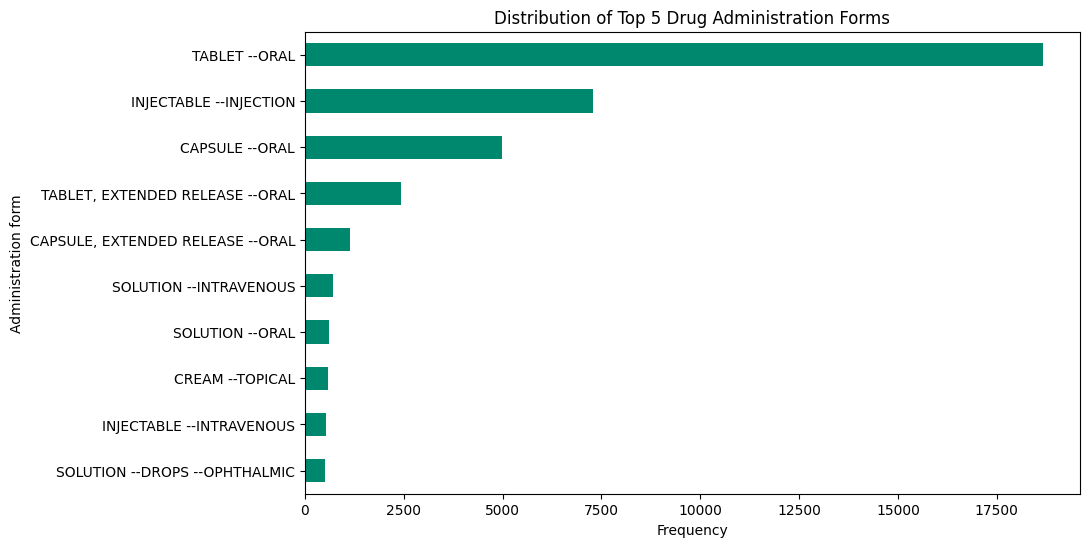

In [82]:
#what is the frequency of the top 5 different administration forms
form_counts = df_products['Form'].value_counts().head(10).sort_values()

# Plot the bar plot
plt.figure(figsize=(10,6))
form_counts.plot(kind='barh', color='#00886F')
plt.title('Distribution of Top 5 Drug Administration Forms')
plt.ylabel('Administration form')
plt.xlabel('Frequency')


#Show the plot
plt.show()

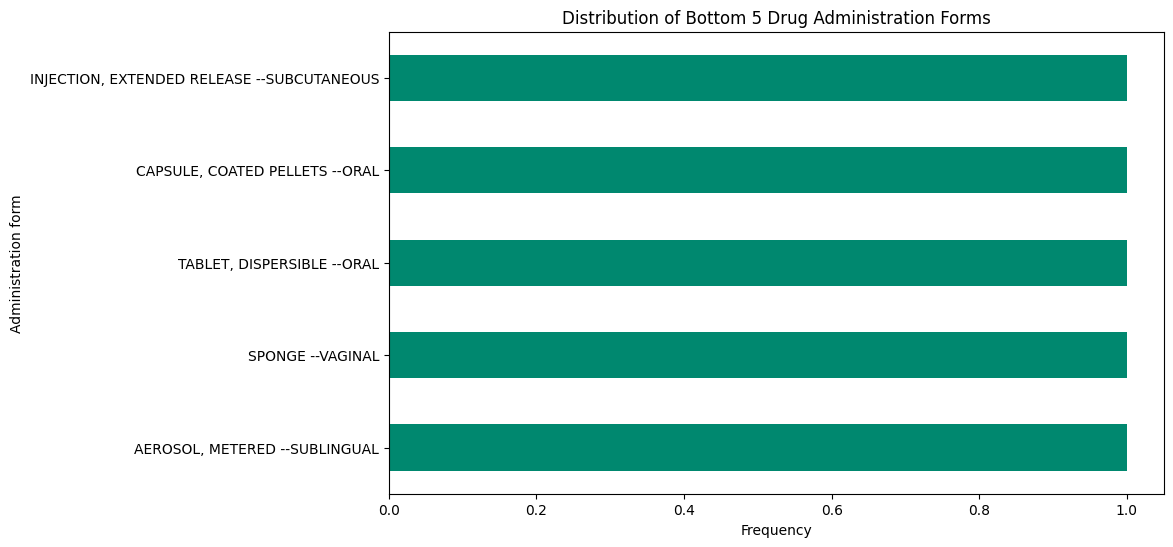

In [83]:
#what is the frequency of the bottom 5 different administration forms
form_counts = df_products['Form'].value_counts().tail(5).sort_values()

# Plot the bar plot
plt.figure(figsize=(10,6))
form_counts.plot(kind='barh', color='#00886F')
plt.title('Distribution of Bottom 5 Drug Administration Forms')
plt.ylabel('Administration form')
plt.xlabel('Frequency')


#Show the plot
plt.show()

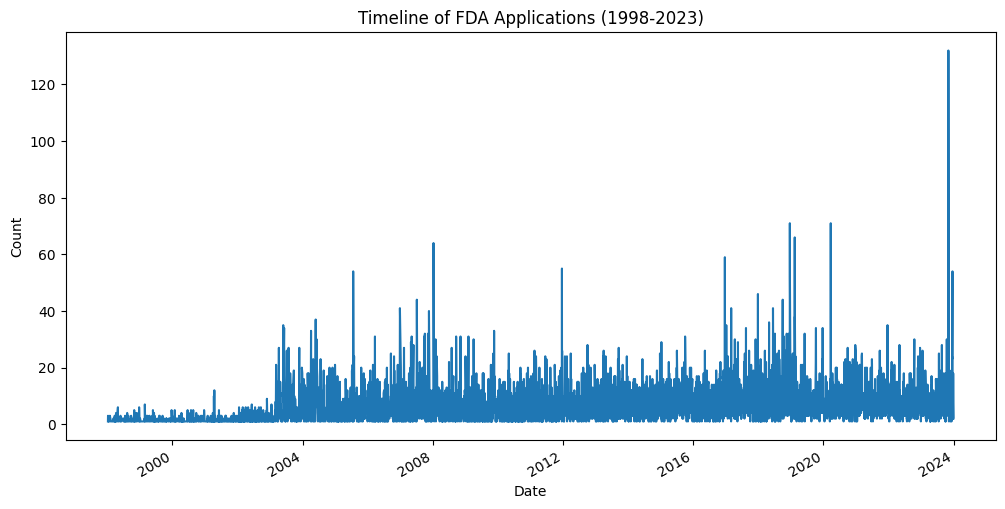

In [84]:
# Let's see the frequency of application throughout the years
merged_df['ApplicationDocsDate'] = pd.to_datetime(merged_df['ApplicationDocsDate'])

# Filter DataFrame for the desired timeline
filtered_df = merged_df[(merged_df['ApplicationDocsDate'].dt.year >= 1998) & (merged_df['ApplicationDocsDate'].dt.year <= 2023)]

# Plot the timeline
plt.figure(figsize=(12, 6))
filtered_df['ApplicationDocsDate'].value_counts().sort_index().plot(kind='line')
plt.title('Timeline of FDA Applications (1998-2023)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()
